# NFL Betting Outcome Prediction

Springboard Data Science Course Capstone Project

# Data Wrangling - Notebook 1

## Import Modules and Packages

In [1]:
#import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import and Inspect Data

In [2]:
# Load files from local directory
# stadiums_raw = pd.read_csv('rawdata/nfl_stadiums.csv', encoding = "ISO-8859-1")
teams = pd.read_csv('rawdata/nfl_teams.csv', encoding = "ISO-8859-1")
scores = pd.read_csv('rawdata/spreadspoke_scores.csv', encoding = "ISO-8859-1")


In [3]:
#explore scores and identify any initial data concerns
print(scores.info())
scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


since a major focus of this analysis will be the rate at which teams beat the betting spread, 
we will remove all entries that do not have favorites, spreads, and over/under lines

In [4]:
# remove rows that have empty values for the over_under_line
scores.dropna(subset=['over_under_line'], inplace=True)
scores.info()
scores.head()
# we will leave all data intact for now, however in the future we will restrict to modern-era games

<class 'pandas.core.frame.DataFrame'>
Index: 11027 entries, 350 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        11027 non-null  object 
 1   schedule_season      11027 non-null  int64  
 2   schedule_week        11027 non-null  object 
 3   schedule_playoff     11027 non-null  bool   
 4   team_home            11027 non-null  object 
 5   score_home           11027 non-null  int64  
 6   score_away           11027 non-null  int64  
 7   team_away            11027 non-null  object 
 8   team_favorite_id     11027 non-null  object 
 9   spread_favorite      11027 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              11027 non-null  object 
 12  stadium_neutral      11027 non-null  bool   
 13  weather_temperature  10050 non-null  float64
 14  weather_wind_mph     10034 non-null  float64
 15  weather_humidity     6369 non-null   fl

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN


In [5]:
#how many unique values are there in each column?
print(scores.nunique())

# curiously, there are 43 total teams listed but only 33 team_favorite_ids
print(scores.team_favorite_id.unique())

schedule_date          2105
schedule_season          56
schedule_week            22
schedule_playoff          2
team_home                43
score_home               60
score_away               55
team_away                43
team_favorite_id         33
spread_favorite          47
over_under_line          68
stadium                 101
stadium_neutral           2
weather_temperature      98
weather_wind_mph         34
weather_humidity         95
weather_detail            8
dtype: int64
['GB' 'IND' 'MIN' 'DAL' 'MIA' 'PIT' 'LVR' 'TB' 'CHI' 'DEN' 'KC' 'LAR' 'NO'
 'NYJ' 'PHI' 'SEA' 'TEN' 'PICK' 'CIN' 'NE' 'ARI' 'LAC' 'CLE' 'WAS' 'BUF'
 'ATL' 'DET' 'NYG' 'SF' 'BAL' 'JAX' 'CAR' 'HOU']


Investigate why scores table has 43 teams but only 33 favorite_ids. 
- It's very unlikely that 10 teams were NEVER favored 

In [6]:
# print(teams)
print(teams.nunique())

# Result: teams table has 44 unique team names and 32 team_ids

team_name                  44
team_name_short            33
team_id                    32
team_id_pfr                33
team_conference             2
team_division               8
team_conference_pre2002     2
team_division_pre2002       6
dtype: int64


In [7]:
# compare different team ids between tables to identify ouliers and choose target for merges
teams_team_id = set(teams['team_id'].unique())
teams_team_id_pfr = set(teams['team_id_pfr'].unique())
scores_team_favorite_id = set(scores['team_favorite_id'].unique())

# Find differences between sets
print(teams_team_id - scores_team_favorite_id)
print(scores_team_favorite_id - teams_team_id)

set()
{'PICK'}


The 'PICK' appears to be the lack of a pick for a favorite. We can leave this in for now

In [8]:
#locate the difference -> why does teams.team_name have one more entry than scores.team_name
hometeamset = set(scores.team_home.unique())
team_name_set = set(teams.team_name.unique())

print(team_name_set - hometeamset)

#ans: 'Boston Patriots'

{'Boston Patriots'}


Since teams.team_id is not a unique identifier for entries in teams df, we could use
teams.team_name as the unique id key for this table. This ID would link teams directly to 
the scores table for all entries in the scores table.

Note: this will make future models act like different teams names for the same franchise over time 
(eg Phoenix Cardinals vs Ariozona Cardinals) are entirely different teams. Is this what we want?

Question: how many (/which) of the 32 team id's are duplicated across the the 43 unique team
names?

In [9]:
print(teams['team_id'].value_counts()[:10])
# print(teams)

team_id
ARI    3
TEN    3
LVR    3
WAS    3
NE     2
LAC    2
LAR    2
IND    2
CIN    1
CLE    1
Name: count, dtype: int64


Likely in future joins and analysis, we will group the 43 team names into their franchises, 
which will be represented by the teams.team_id column. This will allow us to train models with
a consistent field size of 32 NFL teams, because there have never been more than 32 nfl teams 
simultaneously.

## Introductory Visualizations

Let's take an initial look at the distribution of margin of victory for all games in scores
in comparison to the predicted betting spread to catch any glaring differences. Are they centered
around the same spread?

<Axes: ylabel='Frequency'>

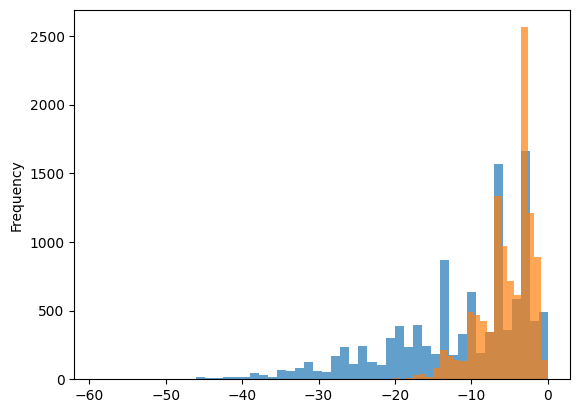

In [10]:
all_game_scoring_margins = -1 * abs(scores.score_home - scores.score_away)

all_game_scoring_margins.plot(kind='hist', bins = 50, alpha=.7)
scores.spread_favorite.plot(kind='hist', bins = 30, alpha=.7)


Unsurprisingly, the distributions have peaks around 3 and 7 point differences because these are the
most common units of scoring in nfl football. And true scoring margins have a much wider distribution as 
expected.

Let's also take a look for patterns in scoring margins over time

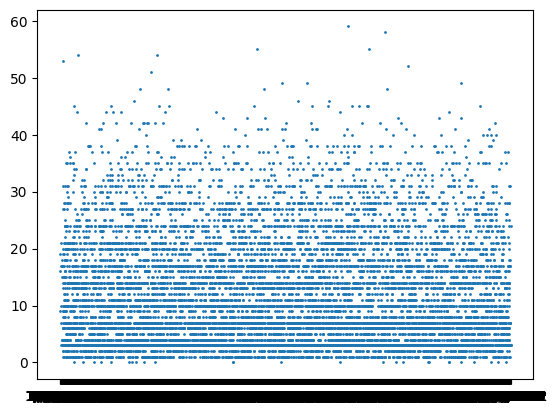

In [11]:
#use scatterplot over time
plt.scatter(x=scores.schedule_date, y=(-1*all_game_scoring_margins), s = 1)

Well that's a ton of scores! But there does not appear to be any major trends in 
scoring margin over time 

Next, looking into each teams scores and checking distributions

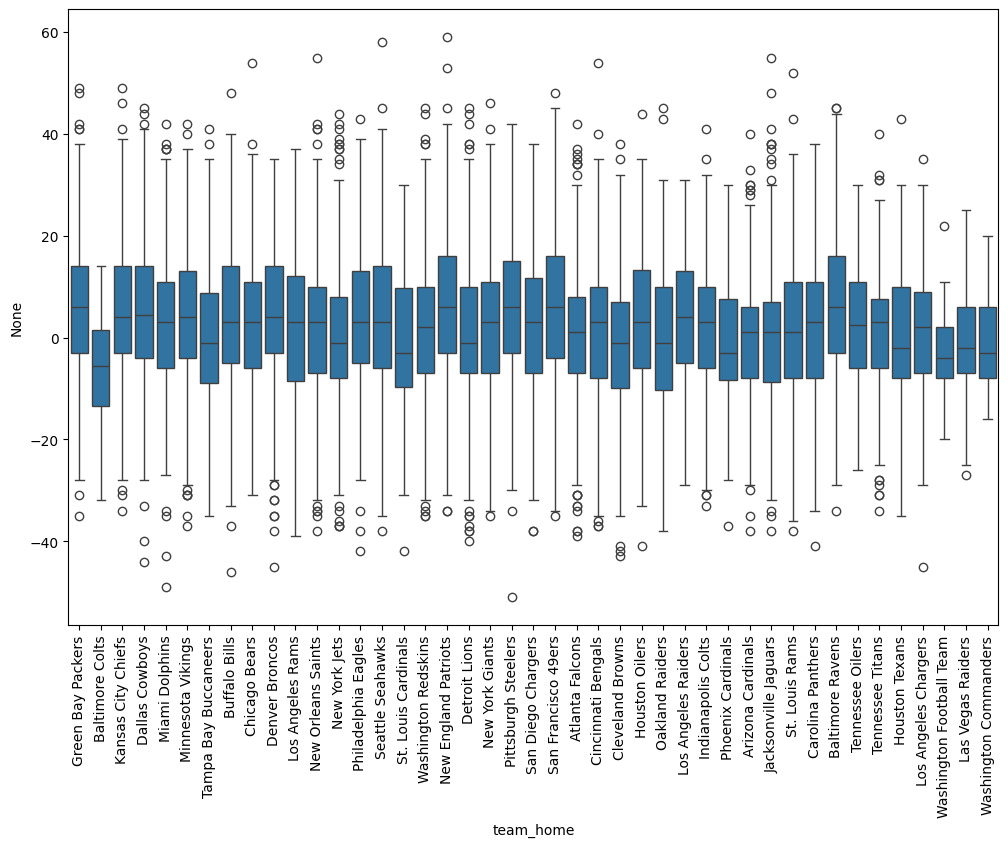

In [12]:
home_margin = scores.score_home - scores.score_away

plt.subplots(figsize=(12, 8))
sns.boxplot(x='team_home', y= home_margin, data=scores)
plt.xticks(rotation='vertical');

## Summary

This notebook contains the import and initial data wrangling for the two data tables “nfl_teams.csv” and “spreadspoke_scores.csv” loaded into python as Pandas dataframes named ‘teams’ and ‘scores’ respectively.

scores initially contained 13,516 entries, each representing a single nfl game. There was only complete betting data provided for 11,027 of these games, so those entries without betting data were removed, as the primary goal of this analysis and modeling will be to generate competitive bets using historical data. After these rows were removed, the only incomplete fields were those including weather data, which we will accept for now, as we are not sure if weather will be included in future modeling.

teams consisted of 44 rows, each representing one NFL team name. There were only 32 unique team_id’s, however, so a comparison was performed to find out why. The 32 team_ids were found to represent individual NFL Franchises, and when the teams moved locations or changed names (e.g. Phoenix Cardinals and Arizona Cardinals are the same franchise with a new name) they appear in the teams table as the same team_id but different team_name. 

Only one team, the Boston Patriots, appeared in the teams data but not in the scores data. This is believed to be as a result of their team name being changed before the betting era from which we have isolated scores data.

Predicted scoring margins and true scoring margins were compared via histogram and as expected they roughly trend together with true scoring margin having a significantly larger variability. Scoring margins were visualized over time to seek any macroscopic trends, but none were found. And finally each team’s scoring margins were compared via boxplot to find if there are any outliers overall by team, in which no significant outliers were identified. 


In [13]:
# Export data for future analysis
teams.to_csv('./data/teams.csv')
scores.to_csv('./data/scores.csv')